# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [2]:
iterationNumber = 3

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_01': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_01']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21486~A.0020.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21563~A.0006.K.jpg.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21890~A.0005.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21902~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22451~A.0011.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22455~A.0002.K.jpg.1L.bmp',
 'D:\\Users\\Chua

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_01': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
  'D:\\

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  3
chr_01
   Train: 
        w21001~A.0008.K.1L.bmp
        w21001~A.0008.K.1R.bmp
        w21002~A.0024.K.jpg.1L.bmp
        w21002~A.0024.K.jpg.1R.bmp
        w21008~A.0008.K.jpg.1L.bmp
        w21008~A.0008.K.jpg.1R.bmp
        W21012~A.0019.K.1L.bmp
        W21012~A.0019.K.1R.bmp
        W21014~A.0005.K.1L.bmp
        W21014~A.0005.K.1R.bmp
        W21022~A.0007.K.jpg.1L.bmp
        W21022~A.0007.K.jpg.1R.bmp
        W21025~A.0002.K.jpg.1L.bmp
        W21025~A.0002.K.jpg.1R.bmp
        W21027~A.0003.K.1R.bmp
        W21486~A.0020.K.jpg.1L.bmp
        W21486~A.0020.K.jpg.1R.bmp
        W21486~A.0020.K.jpg.2L.bmp
        W21486~A.0020.K.jpg.2R.bmp
        W21559~A.0005.1L.bmp
        W21563~A.0006.K.1R.bmp
        W21563~A.0006.K.jpg.bmp
        W21570~A.0001.K.jpg.1L.bmp
        W21570~A.0001.K.jpg.1R.bmp
        W21576~A.0010.K.jpg.1L.bmp
        W21576~A.0010.K.jpg.1R.bmp
        W21587~A.0008.K.jpg.1L.bmp
        W21587~A.0008.K.jpg.1R.bmp
        W21587~A.0010.K.jp

        184431-Y_23.bmp
        184431-Y_24.bmp
        184431-Y_25.bmp
        184431-Y_26.bmp
        184431-Y_3.bmp
        184431-Y_5.bmp
        184431-Y_6.bmp
        184431-Y_9.bmp
        190258-_Y_1.bmp
        190258-_Y_11.bmp
        190258-_Y_13.bmp
        190258-_Y_14.bmp
        190258-_Y_15.bmp
        190258-_Y_17.bmp
        190258-_Y_19.bmp
        190258-_Y_2.bmp
        190258-_Y_20.bmp
        190258-_Y_21.bmp
        190258-_Y_22.bmp
        190258-_Y_23.bmp
        190258-_Y_3.bmp
        190258-_Y_6.bmp
        190258-_Y_8.bmp
        190258-_Y_9.bmp
        191225-_Y_1.bmp
        191225-_Y_12.bmp
        191225-_Y_13.bmp
        191225-_Y_14.bmp
        191225-_Y_16.bmp
        191225-_Y_17.bmp
        191225-_Y_18.bmp
        191225-_Y_19.bmp
        191225-_Y_2.bmp
        191225-_Y_20.bmp
        191225-_Y_21.bmp
        191225-_Y_3.bmp
        191225-_Y_4.bmp
        191225-_Y_6.bmp
        191225-_Y_9.bmp
        193067-_Y_1.bmp
        193067-_Y_10.bmp


### 3.1.1. Helper Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [9]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

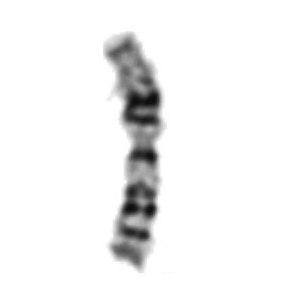

In [10]:
image['chr_01'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [11]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [12]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [13]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [14]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [15]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [16]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

In [17]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
                24:  'chr_18_p11_deletion',
                25: 'chr_18_q10_isochromosome',
                26: 'chr_9_inversion',
                27: 'chr_5_p14_deletion',
                28: 'chr_x_isochromosome',
                29: 'chr_x_p22_cnv', 
                30: 'chr_x_q21_cnv',
                31: 'chr_x_q22_deletion'
               }

In [18]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [19]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [20]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [21]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [22]:
len(X_train)

2544

In [23]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [24]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [27]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

### 3.2.4. Tensorboard Initilization

In [28]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [30]:
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/200
40/40 [==============================] - 10s 171ms/step - loss: 15.0044 - accuracy: 0.0806 - val_loss: 10.8939 - val_accuracy: 0.0590
Epoch 2/200
40/40 [==============================] - 5s 116ms/step - loss: 4.6609 - accuracy: 0.1792 - val_loss: 3.2728 - val_accuracy: 0.0590
Epoch 3/200
40/40 [==============================] - 5s 117ms/step - loss: 3.2205 - accuracy: 0.1285 - val_loss: 3.2060 - val_accuracy: 0.1392
Epoch 4/200
40/40 [==============================] - 5s 118ms/step - loss: 2.9988 - accuracy: 0.1675 - val_loss: 2.6569 - val_accuracy: 0.2476
Epoch 5/200
40/40 [==============================] - 5s 118ms/step - loss: 2.3462 - accuracy: 0.3141 - val_loss: 3.1638 - val_accuracy: 0.1722
Epoch 6/200
40/40 [==============================] - 5s 122ms/step - loss: 2.6555 - accuracy: 0.2602 - val_loss: 2.7902 - val_accuracy: 0.2547
Epoch 7/200
40/40 [==============================] - 5s 118ms/step - loss: 2.4266 - accuracy: 0.3153 - val_loss: 2.1596 - val_accuracy: 0.3

Epoch 58/200
40/40 [==============================] - 5s 118ms/step - loss: 0.2836 - accuracy: 0.9387 - val_loss: 1.8718 - val_accuracy: 0.7358
Epoch 59/200
40/40 [==============================] - 5s 128ms/step - loss: 0.0802 - accuracy: 0.9796 - val_loss: 1.9851 - val_accuracy: 0.7594
Epoch 60/200
40/40 [==============================] - 5s 120ms/step - loss: 0.0424 - accuracy: 0.9894 - val_loss: 1.6942 - val_accuracy: 0.7783
Epoch 61/200
40/40 [==============================] - 5s 118ms/step - loss: 0.0480 - accuracy: 0.9858 - val_loss: 2.0136 - val_accuracy: 0.7193
Epoch 62/200
40/40 [==============================] - 5s 118ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 2.0409 - val_accuracy: 0.7476
Epoch 63/200
40/40 [==============================] - 5s 119ms/step - loss: 0.1195 - accuracy: 0.9788 - val_loss: 1.7831 - val_accuracy: 0.7406
Epoch 64/200
40/40 [==============================] - 5s 130ms/step - loss: 0.1079 - accuracy: 0.9831 - val_loss: 1.5169 - val_accuracy:

Epoch 115/200
40/40 [==============================] - 5s 135ms/step - loss: 0.0096 - accuracy: 0.9961 - val_loss: 2.4064 - val_accuracy: 0.7358
Epoch 116/200
40/40 [==============================] - 5s 122ms/step - loss: 0.0065 - accuracy: 0.9972 - val_loss: 2.4882 - val_accuracy: 0.7406
Epoch 117/200
40/40 [==============================] - 5s 120ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 2.5443 - val_accuracy: 0.7429
Epoch 118/200
40/40 [==============================] - 5s 123ms/step - loss: 0.0044 - accuracy: 0.9972 - val_loss: 2.5762 - val_accuracy: 0.7547
Epoch 119/200
40/40 [==============================] - 5s 122ms/step - loss: 0.0037 - accuracy: 0.9976 - val_loss: 2.6610 - val_accuracy: 0.7571
Epoch 120/200
40/40 [==============================] - 5s 117ms/step - loss: 0.0033 - accuracy: 0.9980 - val_loss: 2.7647 - val_accuracy: 0.7571
Epoch 121/200
40/40 [==============================] - 5s 116ms/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 2.8494 - val_ac

40/40 [==============================] - 5s 125ms/step - loss: 0.0951 - accuracy: 0.9780 - val_loss: 1.5986 - val_accuracy: 0.7571
Epoch 172/200
40/40 [==============================] - 6s 139ms/step - loss: 0.0960 - accuracy: 0.9780 - val_loss: 1.7919 - val_accuracy: 0.7170
Epoch 173/200
40/40 [==============================] - 5s 125ms/step - loss: 0.1238 - accuracy: 0.9693 - val_loss: 1.6557 - val_accuracy: 0.7642
Epoch 174/200
40/40 [==============================] - 5s 128ms/step - loss: 0.0841 - accuracy: 0.9800 - val_loss: 1.8722 - val_accuracy: 0.7948
Epoch 175/200
40/40 [==============================] - 5s 125ms/step - loss: 0.0741 - accuracy: 0.9894 - val_loss: 1.8201 - val_accuracy: 0.7877
Epoch 176/200
40/40 [==============================] - 5s 125ms/step - loss: 0.0449 - accuracy: 0.9906 - val_loss: 2.2574 - val_accuracy: 0.7193
Epoch 177/200
40/40 [==============================] - 5s 125ms/step - loss: 0.0321 - accuracy: 0.9917 - val_loss: 1.8693 - val_accuracy: 0.7854

### 3.2.7 Summary

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### 3.2.8. Tensorboard Display

In [32]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 8376), started 7:00:10 ago. (Use '!kill 8376' to kill it.)

## 3.8 Save the Model

In [33]:
model.save('saved_model/model_allClass_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_allClass_cnn_iteration_3\assets


## 3.9 Load the Model

In [34]:
model_reload = keras.models.load_model('saved_model/model_allClass_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [35]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.785


In [36]:
len(X_test)

424

In [37]:
y_predict = model_reload.predict(X_test)

In [38]:
len(y_predict)

424

In [39]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [40]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [41]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

                          precision    recall  f1-score   support

                   chr_x       0.74      0.74      0.74        27
                  chr_01       0.90      0.90      0.90        10
                  chr_02       0.69      0.90      0.78        10
                  chr_03       1.00      1.00      1.00        10
                  chr_04       0.67      0.60      0.63        10
                  chr_05       0.72      0.79      0.75        29
                  chr_06       0.83      1.00      0.91        10
                  chr_07       1.00      0.80      0.89        10
                  chr_08       0.53      0.80      0.64        10
                  chr_09       0.69      0.73      0.71        37
                  chr_10       0.75      0.90      0.82        10
                  chr_11       0.69      0.90      0.78        10
                  chr_12       0.73      0.80      0.76        10
                  chr_13       1.00      0.70      0.82        10
         

### 3.10.3. Confusion Matrix

In [42]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,20,0,0,0,0,0,0,0,2,2,...,0,0,0,1,0,0,0,1,0,0
chr_01,0,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,1,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,1,0,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,1,0,3,23,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
chr_06,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,0,0,0,0,0,0,1,8,0,0,...,0,0,0,0,1,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,8,1,...,0,0,0,0,0,0,0,0,0,0
chr_09,3,0,0,0,0,0,1,0,2,27,...,0,0,0,0,1,0,0,2,0,0


#### Heat Map

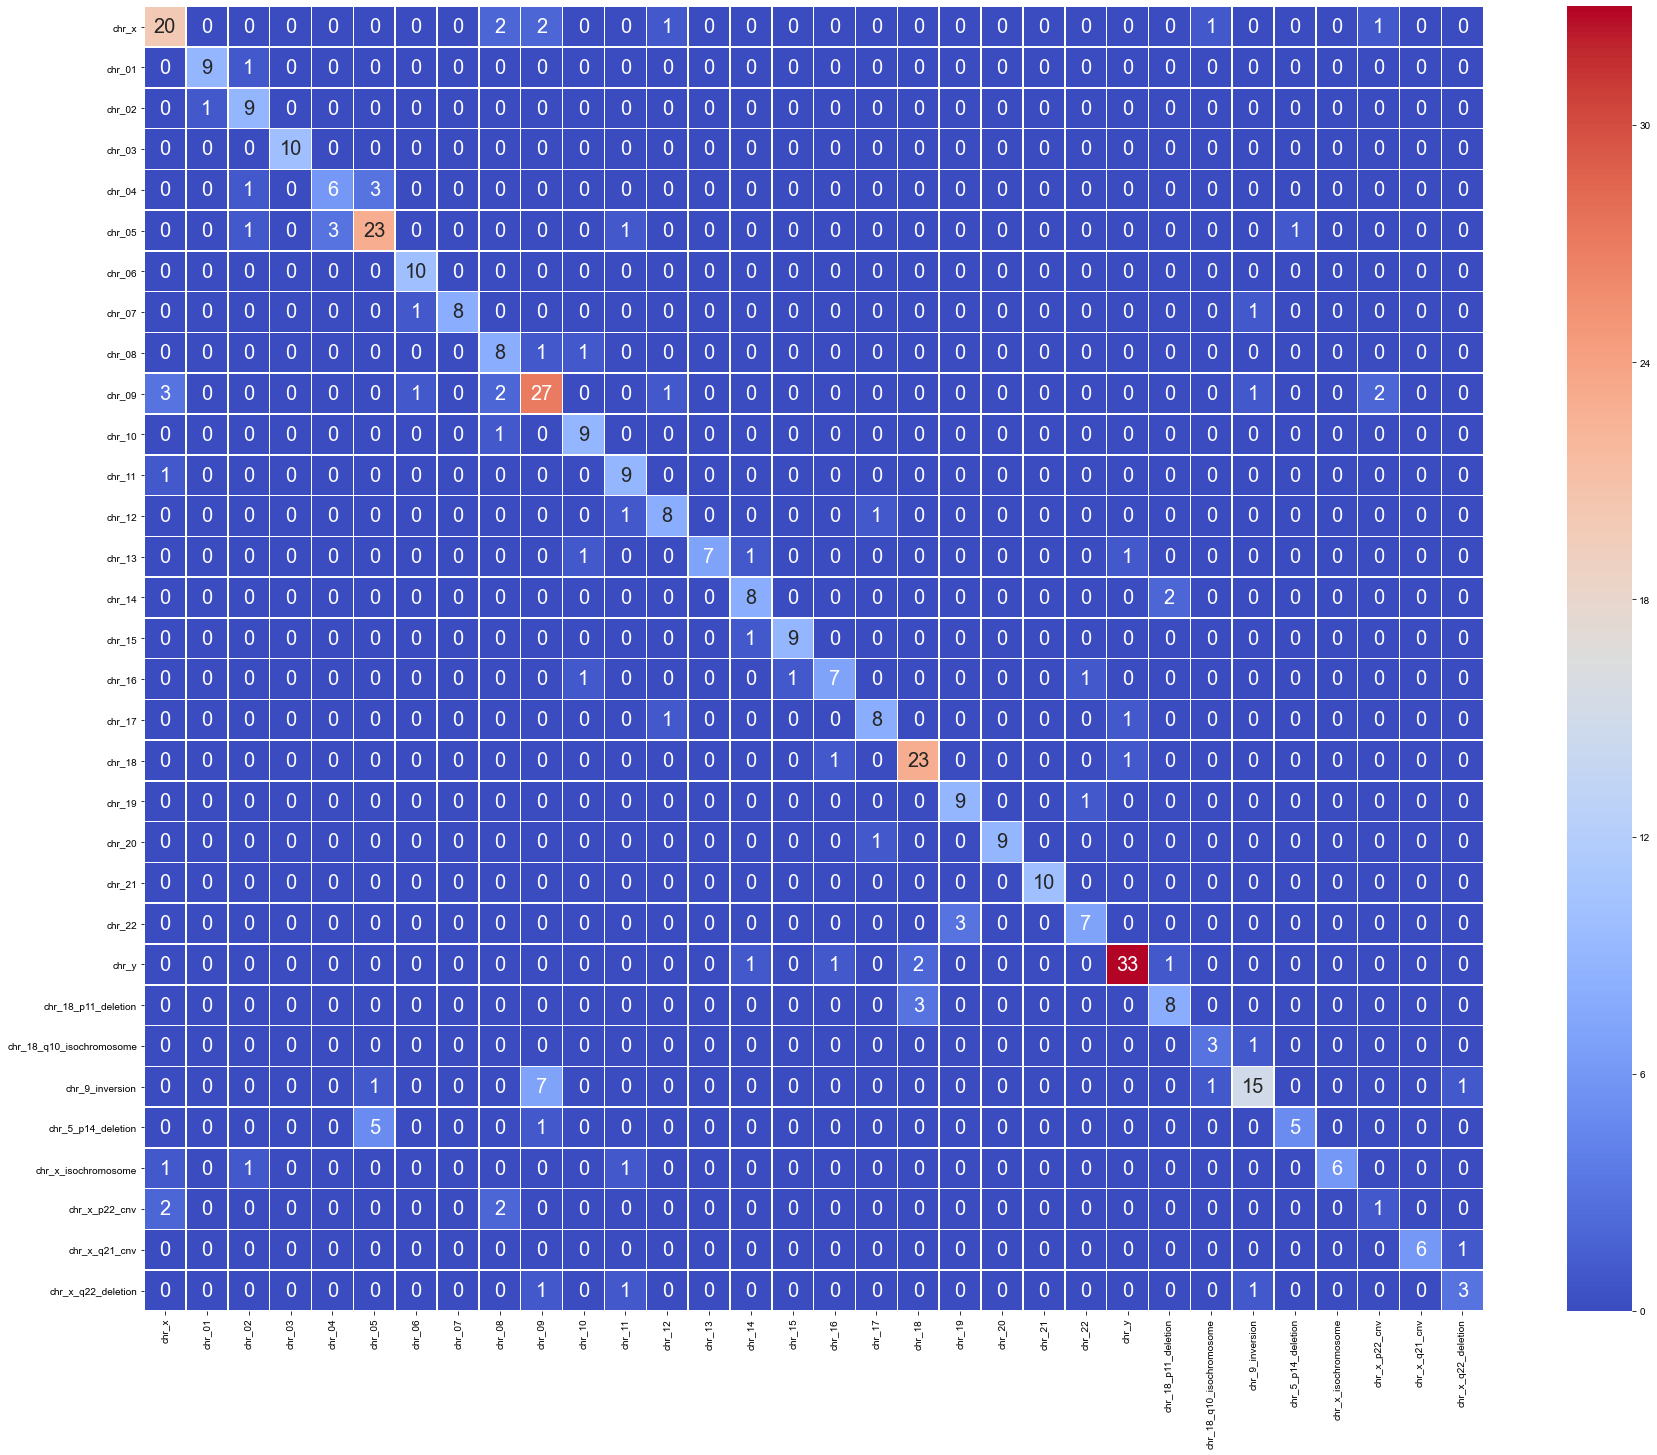

In [43]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [44]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [45]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.785


In [46]:
print(performanceReport)

                          precision    recall  f1-score   support

                   chr_x       0.74      0.74      0.74        27
                  chr_01       0.90      0.90      0.90        10
                  chr_02       0.69      0.90      0.78        10
                  chr_03       1.00      1.00      1.00        10
                  chr_04       0.67      0.60      0.63        10
                  chr_05       0.72      0.79      0.75        29
                  chr_06       0.83      1.00      0.91        10
                  chr_07       1.00      0.80      0.89        10
                  chr_08       0.53      0.80      0.64        10
                  chr_09       0.69      0.73      0.71        37
                  chr_10       0.75      0.90      0.82        10
                  chr_11       0.69      0.90      0.78        10
                  chr_12       0.73      0.80      0.76        10
                  chr_13       1.00      0.70      0.82        10
         

In [47]:
type(performanceReport)

str

In [48]:
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,20,0,0,0,0,0,0,0,2,2,...,0,0,0,1,0,0,0,1,0,0
chr_01,0,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,1,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,1,0,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,1,0,3,23,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
chr_06,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,0,0,0,0,0,0,1,8,0,0,...,0,0,0,0,1,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,8,1,...,0,0,0,0,0,0,0,0,0,0
chr_09,3,0,0,0,0,0,1,0,2,27,...,0,0,0,0,1,0,0,2,0,0


## Export to a text file

In [49]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()